# Using Pandas and Seaborn to solve Marvel Problem

One of the recommended talkpython dataviz projects - Day Two 


### Goals 

1. Parse the `marvel-wikia-data.csv` CSV file and load it into a data structure. You probably want a list of dicts or namedtuples, one for each row. Store this in data which will be in the module's namespace (already done in the template).

2. Get the most popular characters based on the number of appearances they made in comics over the years.

3. Get the year with most and least new Marvel characters introduced respectively, return a (max_year, min_year) tuple. Expect min/max to be pretty far apart.

4. What percentage of the comics characters is female? Please give us the percentage rounded to 2 digits.

5. Good vs bad characters: return a dictionary of bad vs good vs neutral characters per sex. The keys are Bad Characters, Good Characters, Neutral Characters, the values are integer percentages. Who plays the villain more often, a man or a woman?

In [1]:
#import libs
import pandas as pd
import seaborn as sns
#Enable inline plots
%matplotlib inline

In [2]:
df = pd.read_csv('marvel-wikia-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


In [3]:
df.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [4]:
# Drop following columns as they don't contribute towards answering the question 
df = df.drop(['GSM', 'urlslug', 'page_id', 'EYE', 'HAIR', 'ID'], axis = 1)
df.columns = map(str.lower, df.columns)
df.head()

,name,align,sex,alive,appearances,first appearance,year
0,Spider-Man (Peter Parker),Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Good Characters,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),Good Characters,Male Characters,Living Characters,2258.0,Nov-50,1950.0


In [5]:
# Check unique values for alive 
df.alive.unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [6]:
# Fill in NA for appearances, align, and sex 
df.appearances = df.appearances.fillna(0)
df.align = df['align'].fillna('Unknown')
df.sex = df.sex.fillna('Unknown')

df.isnull().sum()

name                   0
align               2812
sex                    0
alive                  3
appearances            0
first appearance     815
year                 815
dtype: int64

In [7]:
# Remove world characters from alive, sex, and align 
df['alive'] = df['alive'].str.replace(' Characters', '')
df['sex'] = df['sex'].str.replace(' Characters', '')
df['align'] = df['align'].str.replace(' Characters', '')
df.head()

,name,align,sex,alive,appearances,first appearance,year
0,Spider-Man (Peter Parker),Good,Male,Living,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Good,Male,Living,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral,Male,Living,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good,Male,Living,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),Good,Male,Living,2258.0,Nov-50,1950.0


### Characters with most appearances 

<AxesSubplot:xlabel='name'>

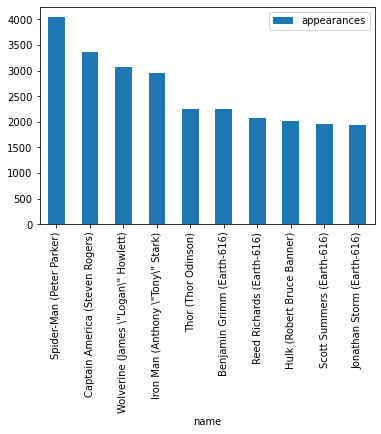

In [8]:
df1 = df.sort_values(by = ['appearances'], ascending = False).head(10)
# Plot a graph of top 10 characters with most appearances 
df1.plot(kind = 'bar', x='name', y='appearances')

### Years with most and least new characters 

In [9]:
# get the year of most and least new Marvel characters introduced respectively, 
# return a (max_year, min_year) tuple, expecting min/max to be pretty far apart. 
df2 = df.groupby(df['year'])['name'].count().reset_index()
minYear = df2.sort_values(by = ['name']).head(1)['year'].iloc[0]
maxYear = df2.sort_values(by = ['name']).tail(1)['year'].iloc[0]
print('Year with the most new chracters: ', int(maxYear), 'and year with the least new characters: ', int(minYear))

Year with the most new chracters:  1993 and year with the least new characters:  1958


<AxesSubplot:xlabel='year'>

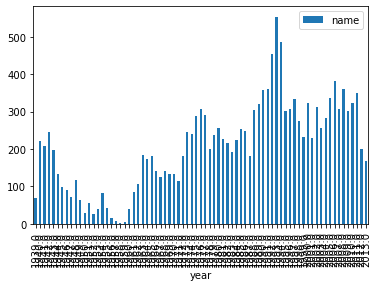

In [10]:
# plot a bar graph of char introductions per year 
df2.plot(kind = 'bar', x = 'year', y = 'name')

### Percentage of female characters 

In [11]:
df3 = df.groupby(by = 'sex')['name'].count().reset_index(name = 'count')
df3['percentage'] = df3['count']/df3['count'].sum() * 100
df3['percentage'] = df3['percentage'].round(2)
df3 = df3.set_index('sex')
df3

,count,percentage
sex,,
Agender,45,0.27
Female,3837,23.43
Genderfluid,2,0.01
Male,11638,71.07
Unknown,854,5.21


In [12]:
pct_female = df3.at['Female', 'percentage']
print('Percentage of female characters', pct_female, '%')

Percentage of female characters 23.43 %


### Good vs. Bad Characters 

In [13]:
# Look at the number of female villians in the dataset 
df.query('align == "Bad" & sex == "Female"')

,name,align,sex,alive,appearances,first appearance,year
101,Raven Darkholme (Earth-616),Bad,Female,Living,371.0,Apr-78,1978.0
112,Felicia Hardy (Earth-616),Bad,Female,Living,332.0,Jul-79,1979.0
164,Amora (Earth-616),Bad,Female,Living,247.0,Apr-64,1964.0
231,Ophelia Sarkissian (Earth-616),Bad,Female,Living,175.0,Feb-69,1969.0
239,Hela (Earth-616),Bad,Female,Deceased,170.0,Mar-64,1964.0
...,...,...,...,...,...,...,...
16297,Mrs. Stane (Earth-616),Bad,Female,Deceased,0.0,NaN,NaN
16331,Shivoor (Earth-616),Bad,Female,Living,0.0,NaN,NaN
16336,Silhouette (Hand) (Earth-616),Bad,Female,Living,0.0,NaN,NaN
16358,Zora Loftus (Earth-616),Bad,Female,Living,0.0,NaN,NaN


In [14]:
filt = (df['align'] == 'Bad')&(df['sex'] == 'Female')
df.loc[filt]

,name,align,sex,alive,appearances,first appearance,year
101,Raven Darkholme (Earth-616),Bad,Female,Living,371.0,Apr-78,1978.0
112,Felicia Hardy (Earth-616),Bad,Female,Living,332.0,Jul-79,1979.0
164,Amora (Earth-616),Bad,Female,Living,247.0,Apr-64,1964.0
231,Ophelia Sarkissian (Earth-616),Bad,Female,Living,175.0,Feb-69,1969.0
239,Hela (Earth-616),Bad,Female,Deceased,170.0,Mar-64,1964.0
...,...,...,...,...,...,...,...
16297,Mrs. Stane (Earth-616),Bad,Female,Deceased,0.0,NaN,NaN
16331,Shivoor (Earth-616),Bad,Female,Living,0.0,NaN,NaN
16336,Silhouette (Hand) (Earth-616),Bad,Female,Living,0.0,NaN,NaN
16358,Zora Loftus (Earth-616),Bad,Female,Living,0.0,NaN,NaN


In [15]:
# Group by alignment and sex, then count for each group 
df4 = df.groupby(by = ['align', 'sex'])['name'].count().reset_index(name = 'count')
# Calculate percentage and create a new column 
df4['percentage'] = df4['count']/df4['count'].sum() * 100 
df4['percentage'] = df4['percentage'].round(2)
df4

,align,sex,count,percentage
0,Bad,Agender,20,0.15
1,Bad,Female,976,7.20
2,Bad,Male,5338,39.35
3,Bad,Unknown,386,2.85
4,Good,Agender,10,0.07
5,Good,Female,1537,11.33
6,Good,Genderfluid,1,0.01
7,Good,Male,2966,21.87
8,Good,Unknown,122,0.90
9,Neutral,Agender,13,0.10


In [16]:
# Add an index for selecting rows for specific groupings 
df4['index'] = df4['align'].map(str) + df4['sex']
df4 = df4.set_index('index')
df4['alignsex'] = df4.index
df4

,align,sex,count,percentage,alignsex
index,,,,,
BadAgender,Bad,Agender,20,0.15,BadAgender
BadFemale,Bad,Female,976,7.20,BadFemale
BadMale,Bad,Male,5338,39.35,BadMale
BadUnknown,Bad,Unknown,386,2.85,BadUnknown
GoodAgender,Good,Agender,10,0.07,GoodAgender
GoodFemale,Good,Female,1537,11.33,GoodFemale
GoodGenderfluid,Good,Genderfluid,1,0.01,GoodGenderfluid
GoodMale,Good,Male,2966,21.87,GoodMale
GoodUnknown,Good,Unknown,122,0.90,GoodUnknown


<AxesSubplot:xlabel='percentage', ylabel='alignsex'>

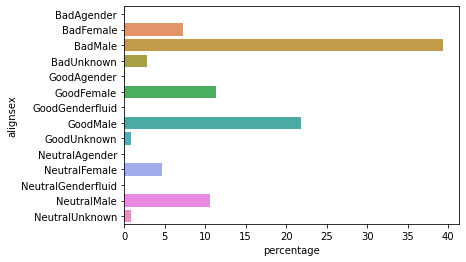

In [17]:
# Create a chart of distribution of align and sex 
sns.barplot(x = 'percentage', y = 'alignsex', data = df4)

In [18]:
# Pct of bad males 
male = df4[['sex', 'align', 'count']].copy()
male = male.query('sex == "Male" & align != "Unknown"')
male['percentage'] = male['count']/male['count'].sum() * 100 
male['percentage'] = male['percentage'].round(2)
male

,sex,align,count,percentage
index,,,,
BadMale,Male,Bad,5338,54.78
GoodMale,Male,Good,2966,30.44
NeutralMale,Male,Neutral,1440,14.78


In [19]:
# Pct of bad females 
female = df4[['sex', 'align', 'count']].copy()
female = female.query('sex == "Female" & align != "Unknown"')
female['percentage'] = female['count']/female['count'].sum() * 100 
female['percentage'] = female['percentage'].round(2)
female

,sex,align,count,percentage
index,,,,
BadFemale,Female,Bad,976,30.95
GoodFemale,Female,Good,1537,48.75
NeutralFemale,Female,Neutral,640,20.30


In [20]:
pct_bad_male = male.at['BadMale', 'percentage']
pct_bad_female = female.at['BadFemale', 'percentage']
print("Percentage of Bad Males: ", int(pct_bad_male), "%. Percentage of Bad Females: ", int(pct_bad_female), "%.")

Percentage of Bad Males:  54 %. Percentage of Bad Females:  30 %.


> A very interesting result that aligns with people's perception that most villians are males.  